# Introduction

Coronary Heart Disease(CHD) globally claims many lives anually. There are many risk factors that have to be considered like diabetes, high blood pressure,abnormal pulse rate, high cholestrol


## dataset information
1.   age: the age of the individual whose attributes are being considered
2.   Sex:
    *   0: Female
    *   1: Male
3.cp-Chest Pain Type:
    *   1: [typical angina](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106/#:~:text=Typical%20angina%20(TA)%20is%20defined,coronary%20artery%20disease%20(CAD).)
    *   2: [atypical angina](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/)
    *   3: [non-anginal pain](https://pubmed.ncbi.nlm.nih.gov/2255129/)
    *   4: asymptomatic

4. trestbps:normal resting blood-pressure  ( in Hg)
5. chol: serum cholestoral (in mg/dl)
6.  restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
7. thalach: maximum heart rate achieved
8. exang: exercise induced angina (1 = yes; 0 = no)
9. oldpeak = ST depression induced by exercise relative to rest
10. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
11. ca: number of major vessels (0-3) colored by flourosopy
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import  train_test_split,KFold,GridSearchCV,StratifiedShuffleSplit,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [49]:
data=pd.read_csv("input/heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# inspecting the presence of null values

In [50]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

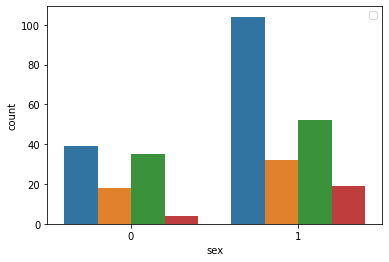

In [51]:
data['target']=data['target'].astype('category')
col=['sex','fbs','cp','restecg','exang','slope','thal']
cat=pd.DataFrame(data=data[col]).astype('category')
num=data.drop(col,axis=1)
sns.countplot(x="sex",data=cat,hue="cp")
plt.legend([])
#plot depicting the distribution of different types of chest pain and their corresponding count in each gender

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 31.3 KB


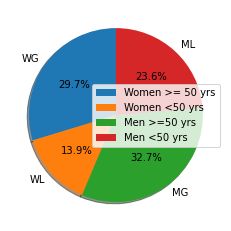

In [53]:
#female positive class patients above the age of 50
fg=data.where((data['age']>=50) & (data['sex']==0) & (data['target']==1)).dropna().shape[0]
#female positive class patients less than 50
fl=data.where((data['age']<50) & (data['sex']==0) & (data['target']==1)).dropna().shape[0]

#male positive class patients above the age of 50
mg=data.where((data['age']>=50) & (data['sex']==1) & (data['target']==1)).dropna().shape[0]
#male positive class patients less than 50
ml=data.where((data['age']<50) & (data['sex']==1) & (data['target']==1)).dropna().shape[0]


# male=data['sex'].sum()
# female=data.shape[0]-data['sex'].sum()
# male=data['sex'].value_counts()[1]
# female=data['sex'].value_counts()[0]
labels=["WG","WL","MG","ML"]
sizes=[fg,fl,mg,ml]
fig,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,shadow=True,startangle=90, autopct='%1.1f%%')
plt.legend(["Women >= 50 yrs","Women <50 yrs","Men >=50 yrs","Men <50 yrs"],loc="right")
plt.show()
#plot shows that below the age of 50 men are more susceptible to CHD while above 50 years the both have same susceptibility


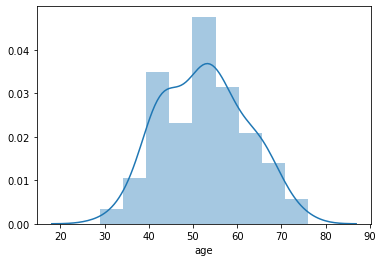

In [54]:
pos_class=data.where(data['target']==1).dropna()
neg_class=data.where(data['target']==0).dropna()

sns.distplot(pos_class['age'])
#plot gives information about the frequency of individuals in their fifties are more prone to suffer from 
#heart diseases

# number of samples of each class

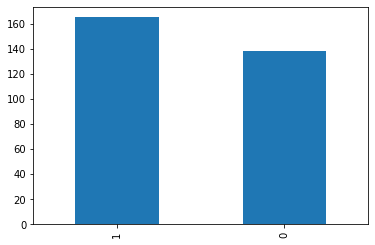

In [55]:
data['target'].value_counts().plot.bar()

In [56]:
# Covariance provides insights on the relation between different features

plt.figure(figsize=(20,20))
sns.heatmap(num.corr(),annot=True,cmap=plt.cm.Reds)
plt.show()

## splitting the data

In [57]:
Y=data['target']
X=data.drop('target',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
# Scaling the data

scaler=StandardScaler().fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)

In [59]:
#Naive Bayes algorithm

nb=GaussianNB().fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
log_conf=plot_confusion_matrix(nb,x_test,y_test,cmap=plt.cm.Blues,normalize='true')
print("Model Accuracy",format(accuracy_score(y_test,y_pred_nb)*100,".3f"),"%")

Model Accuracy 85.246 %


Model Accuracy 85.246 %


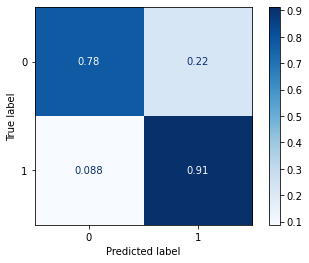

In [60]:
#Logistic Regression

log=LogisticRegression(max_iter=500,solver='newton-cg').fit(X_train,y_train)
y_pred=log.predict(X_test)
log_conf=plot_confusion_matrix(log,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
print("Model Accuracy",format(accuracy_score(y_test,y_pred)*100,".3f"),"%")

Model Accuracy 85.246 %


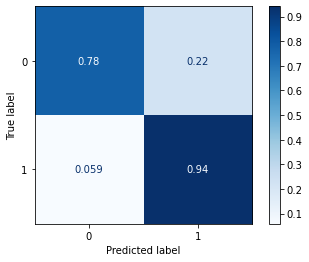

In [61]:
#SVM

svc=SVC().fit(X_train,y_train)
y_svc_pred=log.predict(X_test)
plot_confusion_matrix(svc,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
print("Model Accuracy",format(accuracy_score(y_test,y_svc_pred)*100,".3f"),"%")

## Hyper parameter tuning

In [62]:
c=np.logspace(-2,10,20)
gamma=np.logspace(-9,10,20)
param_grid={"gamma":gamma,"C":c}
shuf=StratifiedShuffleSplit(n_splits=10,test_size=0.4,random_state=0)
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("param=  ", grid.best_params_,"\n score= ",grid.best_score_)

param=   {'C': 14.38449888287663, 'gamma': 0.001} 
 score=  0.8309523809523809


checking if feature selection techniques imporoves the model performance

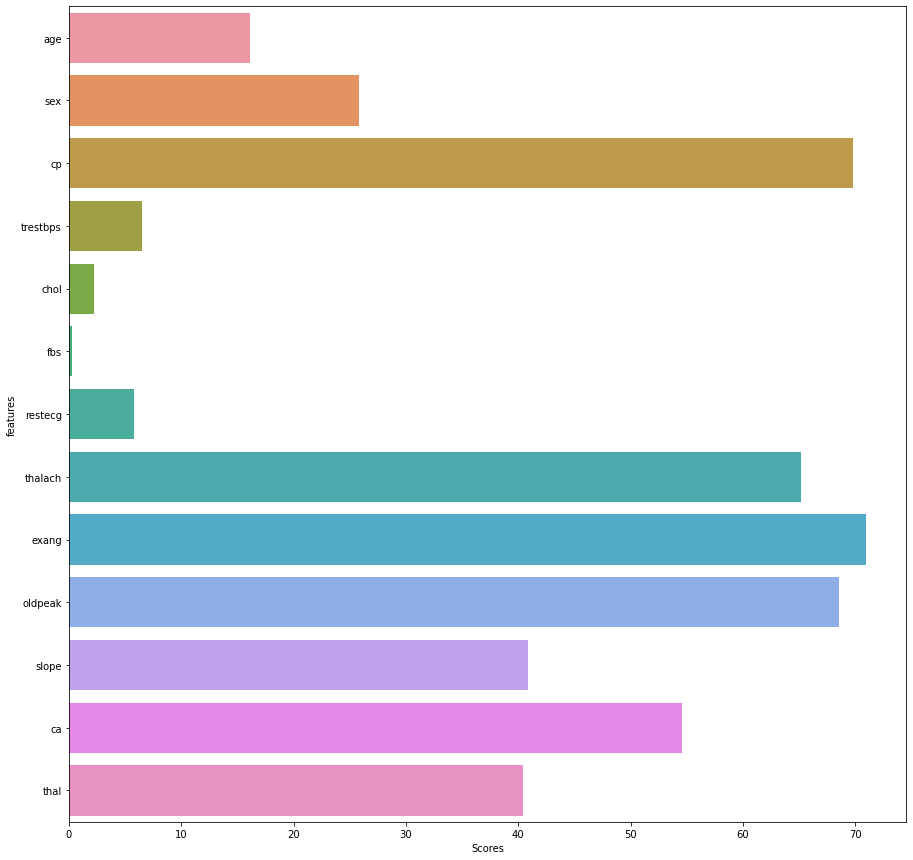

In [63]:
sel=SelectKBest(score_func=f_classif,k="all").fit(X,Y)
features=pd.DataFrame({"Scores":sel.scores_,"features":X.columns})
plt.figure(figsize=(15,15))
sns.barplot(x="Scores",y="features",data=features)

## selecting features that have scores>=40

In [64]:
important_features=features[features["Scores"]>=40]
important_features

Scores features
2   69.772271       cp
7   65.120104  thalach
8   70.952438    exang
9   68.551439  oldpeak
10  40.902071    slope
11  54.559834       ca
12  40.407696     thal

In [65]:
c=np.logspace(-2,10,20)
gamma=np.logspace(-9,10,20)
param_grid={"gamma":gamma,"C":c}
shuf=StratifiedShuffleSplit(n_splits=10,test_size=0.4,random_state=0)
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("param=  ", grid.best_params_,"\n score= ",grid.best_score_)

param=   {'C': 14.38449888287663, 'gamma': 0.001} 
 score=  0.8309523809523809


In [66]:
consider=important_features["features"]
X=data[consider]
Y=data['target']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
scaler=StandardScaler().fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)


# Random Forests

In [67]:
rnd=RandomForestClassifier(random_state=0).fit(x_train,y_train)
y_pred_rnd=rnd.predict(x_test)
plot_confusion_matrix(rnd,x_test,y_test,cmap=plt.cm.Blues,normalize='true')
print("Model Accuracy",format(accuracy_score(y_test,y_pred_rnd)*100,".3f"),"%")

Model Accuracy 82.895 %
